In [3]:
!module list

Currently Loaded Modulefiles:
  1) archive/2020-11       3) py-bluepysnap/0.6.1   5) py-efel/3.0.80
  2) python/3.7.4          4) py-bluepy/0.14.15     6) julia/1.5.2


In [1]:
!module list

Currently Loaded Modulefiles:
  1) archive/2020-11       3) py-bluepysnap/0.6.1   5) py-efel/3.0.80
  2) python/3.7.4          4) py-bluepy/0.14.15     6) julia/1.5.2


In [1]:
from bluepy.v2 import Simulation

import efel

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
#from bluepy.v2.enums import Synapse

#from os import path

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import pickle as pkl

#import h5py

pd.set_option('display.max_columns', 500)

In [2]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [3]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER,Cell.MTYPE,Cell.ETYPE])
mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}

mc2_cells_full = c.cells.get({'$target': 'mc2_Column'})

In [4]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/setup_sim/sim4fig/synchrony/newProj_ca_1p25_met_allOutputs/BlueConfig')


In [5]:
report = sim.report('ATPConcAllCmps', source='h5')
ATPConcAllCmps = report.get()
ATPConcAllCmps = ATPConcAllCmps.reset_index()


`brain` module not found. Using experimental fallback implementation for H5 report access.


In [6]:
ATPConcAllCmps[ATPConcAllCmps.isna().any(axis=1)]

gid,time,2,3,6,11,21,31,39,48,49,83,103,109,119,123,124,126,130,131,132,135,138,156,191,193,197,228,237,246,249,254,270,277,286,292,298,300,313,314,315,330,332,339,347,348,361,386,392,398,402,415,422,427,430,443,450,455,459,466,468,469,480,500,501,519,520,522,531,534,538,547,553,562,563,587,609,610,613,630,635,644,649,659,664,689,693,702,704,705,724,730,733,749,753,760,769,775,779,783,790,795,806,810,823,830,843,844,846,855,856,857,874,876,887,888,897,900,918,923,927,929,934,935,948,954,956,961,973,979,984,999,1001,1004,1024,1029,1035,1043,1044,1047,1049,1054,1060,1061,1062,1064,1078,1079,1085,1092,1097,1107,1118,1133,1138,1144,1154,1157,1160,1167,1168,1170,1174,1175,1176,1182,1183,1188,1201,1218,1228,1244,1247,1251,1252,1257,1262,1265,1268,1285,1297,1308,1312,1323,1325,1329,1339,1352,1357,1361,1373,1383,1386,1389,1390,1398,1402,1403,1408,1412,1428,1438,1445,1447,1449,1459,1466,1470,1471,1473,1475,1477,1486,1491,1494,1496,1504,1505,1528,1536,1541,1550,1555,1559,1567,1568,1579,1587,1597,1599,1611,1617,1620,1623,1625,1642,1643,1649,1658,1672,1681,1684,1700,1707,1722,1731,1736,1748,1755,1757,1784,...,161460,161466,161481,161490,161500,161511,161513,161521,161527,161532,161536,161541,161561,161563,161579,161587,161597,161603,161607,161608,161612,161616,161617,161628,161632,161633,161637,161640,161651,161653,161659,161667,161673,161676,161678,161683,161689,161705,161706,161711,161718,161726,161727,161757,161760,161779,161782,161788,161790,161792,161801,161806,161809,161830,161837,161852,161867,161891,161904,161909,161917,161925,161938,161948,161953,161957,161962,161976,161987,161991,162009,162020,162027,162034,162040,162042,162045,162053,162083,162085,162095,162097,162105,162110,162113,162114,162119,162127,162133,162156,162157,162158,162172,162183,162192,162194,162203,162209,162215,162223,162225,162241,162242,162244,162247,162268,162272,162283,162286,162291,162293,162297,162313,162316,162334,162336,162344,162345,162359,162380,162384,162390,162396,162402,162409,162410,162412,162419,162420,162421,162439,162444,162448,162450,162466,162468,162471,162472,162476,162477,162478,162495,162498,162499,162516,162517,162529,162542,162564,162565,162568,162576,162599,162604,162646,162653,162654,162660,162666,162667,162669,162672,162676,162699,162704,162709,162715,162721,162728,162738,162739,162746,162747,162755,162759,162765,162769,162797,162799,162804,162811,162812,162814,162818,162824,162825,162826,162834,162836,162859,162860,162864,162870,162872,162875,162880,162882,162883,162887,162888,162889,162903,162908,162917,162920,162922,162928,162934,162942,162950,162951,162953,162956,162966,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089,163101,163107,163111,163117,163133,163148,163161,163168,163170,163173,163176,163190,163194,163199,163206,163207,163211,163221,163231,163241,163250,163254,163255,163257,163260,163263
1,1.0,1.933459,1.933481,1.686309,0.893914,1.415656,1.842321,1.781145,1.688884,1.545424,1.627309,1.758831,1.670035,1.626999,1.781145,1.555413,1.555374,1.654489,1.781145,1.659772,1.560497,1.825846,1.220311,1.627072,1.608136,0.680438,1.220311,1.622955,0.680438,1.654489,1.516149,1.220311,0.536762,0.123519,0.808523,0.238636,0.238636,0.123519,0.325591,0.180965,0.457985,0.995506,0.169119,0.660594,0.788650,0.715633,0.808523,0.527846,1.582982,0.747782,0.123519,0.123519,1.335037,0.238873,0.475532,1.335037,0.787219,0.238508,1.057785,0.995506,0.726483,0.995506,0.788791,0.536761,0.715633,0.169118,0.536761,0.238818,0.660180,0.169118,1.061107,1.058216,0.752598,0.527858,0.788100,0.196129,1.335037,0.210817,1.152367,0.726484,0.921124,0.314536,0.462931,0.704646,1.115402,0.169117,0.443878,1.056444,0.660444,0.726484,0.325591,0.864511,0.325591,0.920001,1.335037,0.652515,0.704646,1.380714,0.180965,0.536761,1.152498,0.726484,0.180965,0.487331,0.536761,0.238342,0.747782,0.180965,0.123519,0.527857,0.169112,1.335037,0.926703,0.660769,0.808524,0.180965,0.536761,0.536762,0.831977,0.196129,0.169126,0.169122,0.180965,0.123519,0.787055,0.527917,0.12

In [7]:
len(ATPConcAllCmps.loc[ATPConcAllCmps['time']==1,ATPConcAllCmps.isna().any(axis=0)].columns)/len(ATPConcAllCmps.columns)

0.016580130023124917

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-numpy-1.17.3-edmewrnybo/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-numpy-1.17.3-edmewrnybo/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


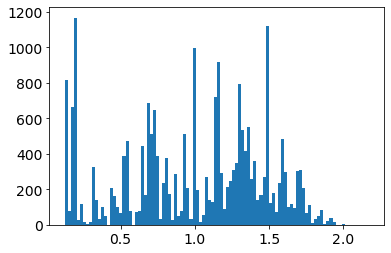

In [9]:
#test
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==1,mc2_cells.index],bins=100)
plt.show()

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-numpy-1.17.3-edmewrnybo/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-numpy-1.17.3-edmewrnybo/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


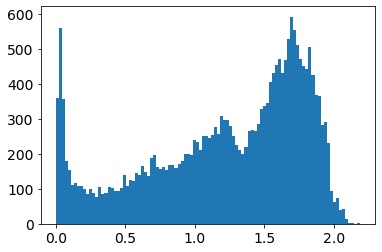

In [15]:
#test
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==1400,mc2_cells.index],bins=100)
plt.show()

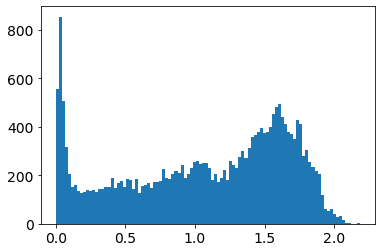

In [10]:
#test
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==ATPConcAllCmps['time'].max(),mc2_cells.index],bins=100)
plt.show()

In [8]:
atp_t = ATPConcAllCmps.transpose()
atp_t.columns = atp_t.loc['time',:]
atp_t.drop(atp_t.index[0], inplace=True)

atp_t = atp_t.reset_index()

In [9]:
len(atp_t.loc[atp_t.isna().any(axis=1),'gid'].unique())

380

In [10]:
mc2_cells = mc2_cells.reset_index()

In [11]:
mc2_cells.loc[mc2_cells['index'].isin(atp_t.loc[atp_t.isna().any(axis=1),'gid'].unique()),:]

,index,x,y,z,synapse_class,layer,mtype,etype
2683,19230,523.288623,1743.035408,629.014364,INH,3,L23_BTC,bIR
2698,19340,378.969615,1430.043795,605.039713,INH,3,L23_BTC,bIR
2711,19395,486.704540,1748.810245,541.017591,INH,3,L23_BTC,bIR
2745,19676,222.969214,1715.278664,580.672904,INH,3,L23_BP,dSTUT
2748,19728,442.701952,1437.840785,518.635629,INH,3,L23_BP,dSTUT
...,...,...,...,...,...,...,...,...
22903,163190,341.099102,1179.925664,632.415730,INH,5,L5_BP,bIR
22904,163194,238.864888,943.557439,539.757280,INH,5,L5_BP,dSTUT
22906,163206,500.538799,919.120002,539.188392,INH,5,L5_BP,bIR
22909,163221,459.494332,851.401747,616.328785,INH,5,L5_BP,bIR


In [12]:
mc2_cells = mc2_cells.rename(columns = {'index':'gid'})

In [14]:
atp_t.index = atp_t['gid']

In [15]:
atp_t = atp_t.drop(columns='gid')

In [31]:
atp_t.head()

time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,...,2250.0,2251.0,2252.0,2253.0,2254.0,2255.0,2256.0,2257.0,2258.0,2259.0,2260.0,2261.0,2262.0,2263.0,2264.0,2265.0,2266.0,2267.0,2268.0,2269.0,2270.0,2271.0,2272.0,2273.0,2274.0,2275.0,2276.0,2277.0,2278.0,2279.0,2280.0,2281.0,2282.0,2283.0,2284.0,2285.0,2286.0,2287.0,2288.0,2289.0,2290.0,2291.0,2292.0,2293.0,2294.0,2295.0,2296.0,2297.0,2298.0,2299.0,2300.0,2301.0,2302.0,2303.0,2304.0,2305.0,2306.0,2307.0,2308.0,2309.0,2310.0,2311.0,2312.0,2313.0,2314.0,2315.0,2316.0,2317.0,2318.0,2319.0,2320.0,2321.0,2322.0,2323.0,2324.0,2325.0,2326.0,2327.0,2328.0,2329.0,2330.0,2331.0,2332.0,2333.0,2334.0,2335.0,2336.0,2337.0,2338.0,2339.0,2340.0,2341.0,2342.0,2343.0,2344.0,2345.0,2346.0,2347.0,2348.0,2349.0,2350.0,2351.0,2352.0,2353.0,2354.0,2355.0,2356.0,2357.0,2358.0,2359.0,2360.0,2361.0,2362.0,2363.0,2364.0,2365.0,2366.0,2367.0,2368.0,2369.0,2370.0,2371.0,2372.0,2373.0,2374.0,2375.0,2376.0,2377.0,2378.0,2379.0,2380.0,2381.0,2382.0,2383.0,2384.0,2385.0,2386.0,2387.0,2388.0,2389.0,2390.0,2391.0,2392.0,2393.0,2394.0,2395.0,2396.0,2397.0,2398.0,2399.0,2400.0,2401.0,2402.0,2403.0,2404.0,2405.0,2406.0,2407.0,2408.0,2409.0,2410.0,2411.0,2412.0,2413.0,2414.0,2415.0,2416.0,2417.0,2418.0,2419.0,2420.0,2421.0,2422.0,2423.0,2424.0,2425.0,2426.0,2427.0,2428.0,2429.0,2430.0,2431.0,2432.0,2433.0,2434.0,2435.0,2436.0,2437.0,2438.0,2439.0,2440.0,2441.0,2442.0,2443.0,2444.0,2445.0,2446.0,2447.0,2448.0,2449.0,2450.0,2451.0,2452.0,2453.0,2454.0,2455.0,2456.0,2457.0,2458.0,2459.0,2460.0,2461.0,2462.0,2463.0,2464.0,2465.0,2466.0,2467.0,2468.0,2469.0,2470.0,2471.0,2472.0,2473.0,2474.0,2475.0,2476.0,2477.0,2478.0,2479.0,2480.0,2481.0,2482.0,2483.0,2484.0,2485.0,2486.0,2487.0,2488.0,2489.0,2490.0,2491.0,2492.0,2493.0,2494.0,2495.0,2496.0,2497.0,2498.0,2499.0
gid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2.199999,1.933459,1.933209,1.932958,1.932707,1.932456,1.932206,1.931955,1.931704,1.931453,1.931203,1.930952,1.930701,1.930449,1.930197,1.929945,1.929692,1.929439,1.929186,1.928932,1.928678,1.928423,1.928168,1.927913,1.927657,1.927401,1.927144,1.926887,1.926630,1.926372,1.926113,1.925855,1.925596,1.925337,1.925077,1.924817,1.924557,1.924296,1.

In [16]:
atp_t['atp_mean'] = atp_t.mean(axis=1)

In [17]:
atp_mean = atp_t.loc[:,['atp_mean']].copy()
atp_mean = atp_mean.reset_index()


In [35]:
atp_mean.head()

time,gid,atp_mean
0,2,2.080801
1,3,2.071844
2,6,1.953102
3,11,0.937310
4,21,1.784588


In [18]:
glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/allOuts_new_ca1p25_gen_thal_outs_r_glut_2021031216.txt",sep='\t',header=None)
gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/allOuts_new_ca1p25_gen_thal_outs_r_gaba_2021031216.txt",sep='\t',header=None)


glut.columns = ['idxm','c_gid','glut_releases_per_pre']
gaba.columns = ['idxm','c_gid','gaba_releases_per_pre']


In [19]:
postglut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/allOuts_new_ca1p25_gen_thal_ins_r_glut_2021031216.txt",sep='\t',header=None)
postgaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/allOuts_new_ca1p25_gen_thal_ins_r_gaba_2021031216.txt",sep='\t',header=None)


postglut.columns = ['idxm','rank','c_gid','glut_releases_received_per_post']
postgaba.columns = ['idxm','rank','c_gid','gaba_releases_received_per_post']


In [20]:
releases_pre = pd.merge(glut,gaba,how='inner',on=['idxm','c_gid'])
releases_post = pd.merge(postglut,postgaba,how='inner',on=['idxm','c_gid'])

releases_all = pd.merge(releases_pre,releases_post,how='inner',on=['idxm','c_gid'])

In [21]:
releases_all = releases_all.drop(columns=['rank_x','rank_y'])

In [22]:
releases_all.head()

,idxm,c_gid,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post
0,0,292,841.0,0.0,307.0,55.0
1,0,443,896.0,0.0,358.0,115.0
2,0,468,1575.0,0.0,151.0,11.0
3,0,469,1089.0,0.0,124.0,29.0
4,0,779,1008.0,0.0,669.0,182.0


In [15]:
releases_all['idxm'].unique()  # !!! because if idxm % 10 == 0:  with open(

array([0, 1, 2, 3, 4])

In [16]:
len(releases_all['c_gid'].unique())

22918

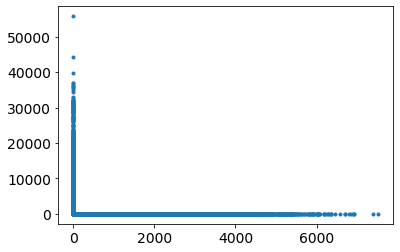

In [17]:
plt.plot(releases_all['glut_releases_per_pre'],releases_all['gaba_releases_per_pre'],'.')
plt.show()

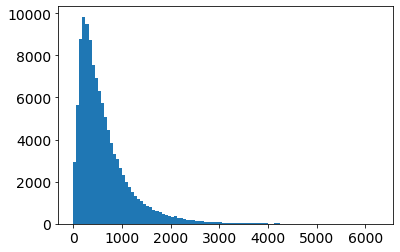

In [18]:
plt.hist(postglut['glut_releases_received_per_post'],bins = 100)
plt.show()

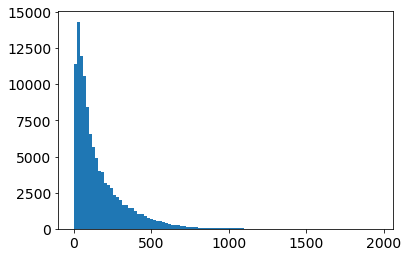

In [19]:
plt.hist(postgaba['gaba_releases_received_per_post'],bins = 100)
plt.show()

In [23]:
um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/allOuts_new_ca1p25_gen_thal_um_2021031216.txt",header=None,sep = "\t") 
param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/allOuts_new_ca1p25_gen_thal_param_2021031216.txt",header=None,sep = "\t") 

# gen Calv 

um_colnames = ["c_gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi", "ksi_ephys"]
print(len(um_colnames))

um.columns =  um_colnames

um = um.add_prefix('with_met_')

um = um.rename(columns={"with_met_c_gid":"c_gid",
                        "with_met_mpi_rank":"mpi_rank",
                        "with_met_idxm":"idxm"})

param.columns = ['c_gid','rank','idxm',
                 'ina_density', 'const_ksi', 'voltages_per_gids', 'nais_mean', 'kis_mean', 
                 'ik_density', 'const41','pAKTPFK2', 'atpi_mean','atp_vm27','cais_mean','mito_scale','glutamatergic_gaba_scaling','outs_r_to_met','cells_volumes_um3']


40


In [36]:
releases_params = pd.merge(param,releases_all,how='inner',on=['idxm','c_gid'])

In [25]:
#releases_params = releases_params.loc[releases_params['idxm']>0,:]

In [32]:
releases_params.head()

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post,gid,synapse_class,layer,mtype,etype
0,15752,2211,1,-0.000345,0.06,-65.0,13.177087,136.348012,-0.001184,4.1,0.17,0.170793,1.185396,0.000145,0.826873,0.1,0.000002,2947.680969,495.0,0.0,125.0,20.0,15752,EXC,3,L3_TPC:A,cADpyr
1,15752,2211,2,-0.084626,0.06,-65.0,13.332517,136.190059,0.087766,4.1,0.17,0.160189,1.180094,0.000129,0.826873,0.1,0.000002,2947.680969,427.0,0.0,103.0,27.0,15752,EXC,3,L3_TPC:A,cADpyr
2,15752,2211,3,-0.040652,0.06,-65.0,13.423590,135.835169,0.056149,4.1,0.17,0.160857,1.180428,0.000144,0.826873,0.1,0.000002,2947.680969,491.0,0.0,119.0,19.0,15752,EXC,3,L3_TPC:A,cADpyr
3,15752,2211,4,-0.000325,0.06,-65.0,13.135075,135.994152,0.000165,4.1,0.17,0.177891,1.188946,0.000144,0.826873,0.1,0.000002,2947.680969,354.0,0.0,106.0,26.0,15752,EXC,3,L3_TPC:A,cADpyr
4,15743,2210,1,0.000611,0.06,-65.0,13.764856,136.371387,0.000598,4.1,0.17,0.899152,1.549576,0.000204,0.826873,0.1,0.000004,1908.906965,580.0,0.0,149.0,6.0,15743,EXC,3,L3_TPC:A,cADpyr


In [31]:
releases_params = pd.merge(releases_params,mc2_cells.loc[:,['gid','synapse_class', 'layer', 'mtype', 'etype']],how='inner',left_on='c_gid',right_on='gid')

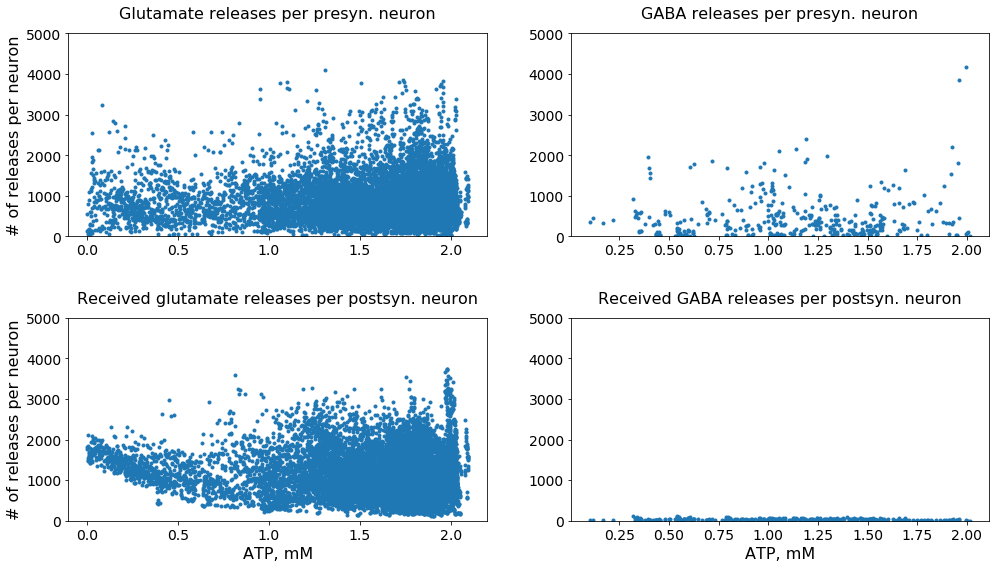

In [35]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params.loc[releases_params['mtype'].isin(['L5_TPC:A','L5_TPC:B','L5_TPC:C']),'atpi_mean'],releases_params.loc[releases_params['mtype'].isin(['L5_TPC:A','L5_TPC:B','L5_TPC:C']),'glut_releases_per_pre'],'.')
ax2.plot(releases_params.loc[releases_params['mtype'].isin(['L5_MC']),'atpi_mean'],releases_params.loc[releases_params['mtype'].isin(['L5_MC']),'gaba_releases_per_pre'],'.')
ax3.plot(releases_params.loc[releases_params['mtype'].isin(['L5_TPC:A','L5_TPC:B','L5_TPC:C']),'atpi_mean'],releases_params.loc[releases_params['mtype'].isin(['L5_TPC:A','L5_TPC:B','L5_TPC:C']),'glut_releases_received_per_post'],'.')
ax4.plot(releases_params.loc[releases_params['mtype'].isin(['L5_MC']),'atpi_mean'],releases_params.loc[releases_params['mtype'].isin(['L5_MC']),'gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 5000])
ax2.set_ylim([0, 5000])
ax3.set_ylim([0, 5000])
ax4.set_ylim([0, 5000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/zoom_releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/zoom_releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()


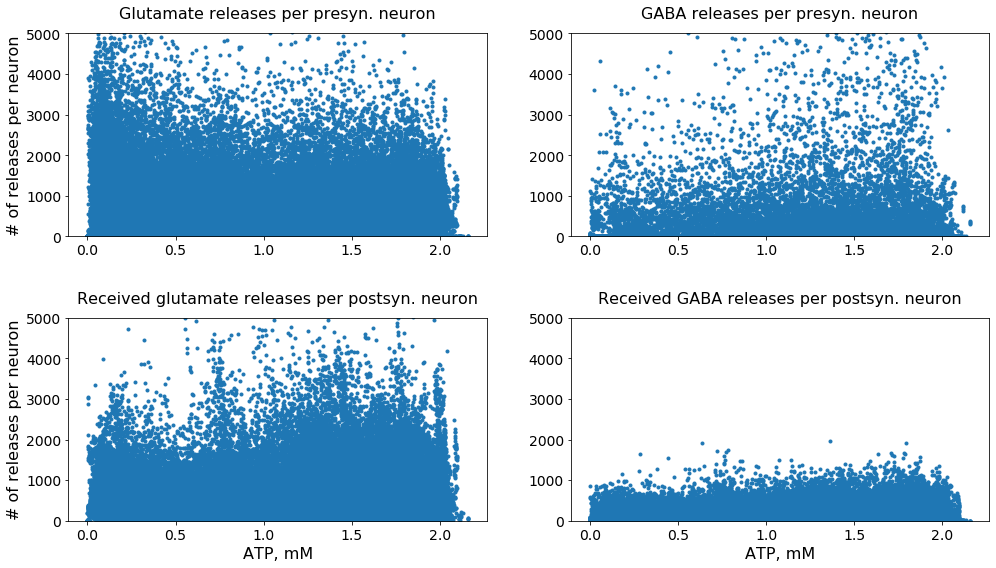

In [37]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params['atpi_mean'],releases_params['glut_releases_per_pre'],'.')
ax2.plot(releases_params['atpi_mean'],releases_params['gaba_releases_per_pre'],'.')
ax3.plot(releases_params['atpi_mean'],releases_params['glut_releases_received_per_post'],'.')
ax4.plot(releases_params['atpi_mean'],releases_params['gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 5000])
ax2.set_ylim([0, 5000])
ax3.set_ylim([0, 5000])
ax4.set_ylim([0, 5000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/zoom_releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/zoom_releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()


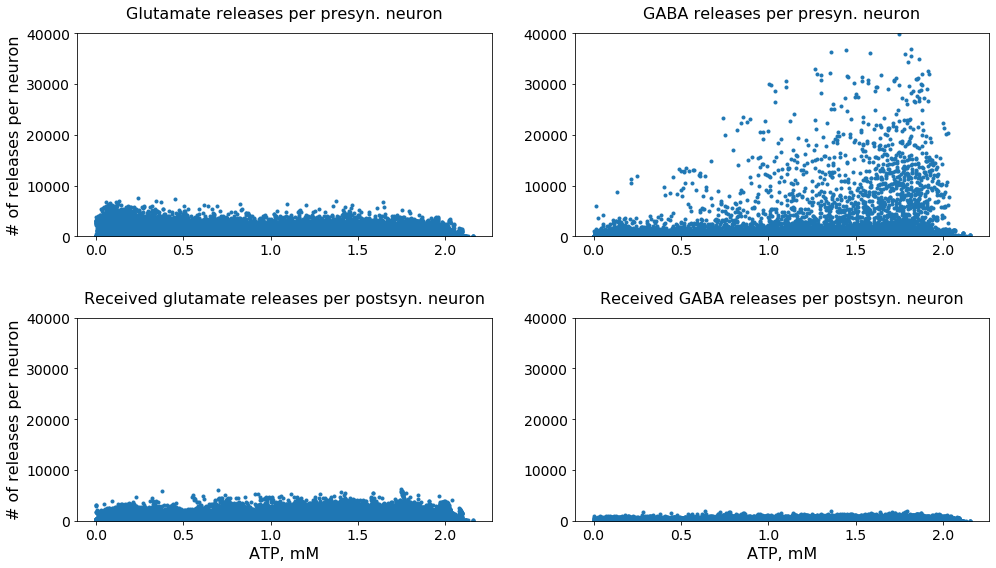

In [38]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params['atpi_mean'],releases_params['glut_releases_per_pre'],'.')
ax2.plot(releases_params['atpi_mean'],releases_params['gaba_releases_per_pre'],'.')
ax3.plot(releases_params['atpi_mean'],releases_params['glut_releases_received_per_post'],'.')
ax4.plot(releases_params['atpi_mean'],releases_params['gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 40000])
ax2.set_ylim([0, 40000])
ax3.set_ylim([0, 40000])
ax4.set_ylim([0, 40000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()


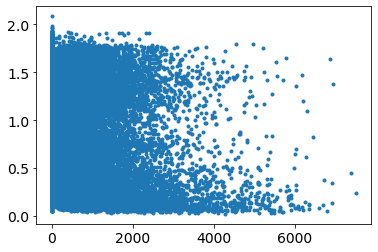

In [53]:
#new
plt.plot(releases_params['glut_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

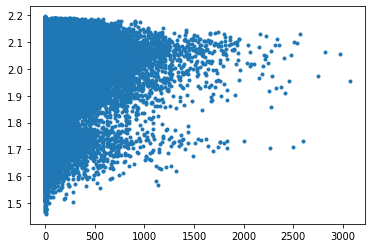

In [36]:
plt.plot(releases_params['glut_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

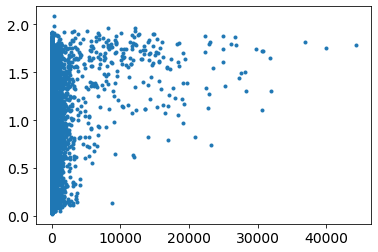

In [54]:
# new
plt.plot(releases_params['gaba_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

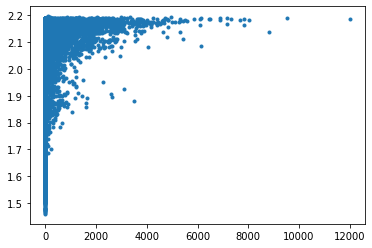

In [38]:
plt.plot(releases_params['gaba_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

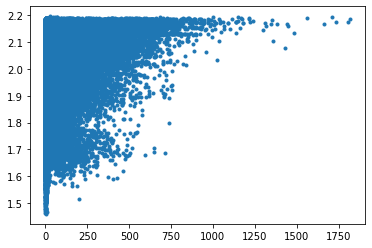

In [37]:
plt.plot(releases_params['glut_releases_received_per_post'],releases_params['atpi_mean'],'.')
plt.show()


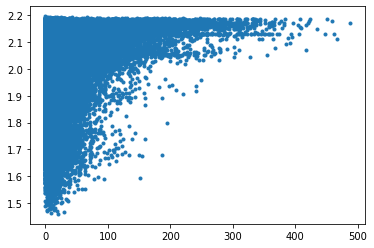

In [39]:
plt.plot(releases_params['gaba_releases_received_per_post'],releases_params['atpi_mean'],'.')
plt.show()


In [ ]:
report = sim.report('KConcAllCmps', source='h5')
KConcAllCmps = report.get()
KConcAllCmps = KConcAllCmps.reset_index()

In [32]:
report = sim.report('NaConcAllCmps', source='h5')
NaConcAllCmps = report.get()
NaConcAllCmps = NaConcAllCmps.reset_index()
